C:\Users\radir\AppData\Local\Temp\ipykernel_31076\3097795962.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_año = DF.groupby('AÑO')['PASAJEROS_POR_DESTINO'].mean()
C:\Users\radir\AppData\Local\Temp\ipykernel_31076\3097795962.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = DF.groupby(['AÑO', 'Estacion'])['PASAJEROS_POR_DESTINO'].sum().unstack().plot(kind='area', stacked=True, cmap='viridis', ax=plt.gca(), legend=False, x_compat=True)


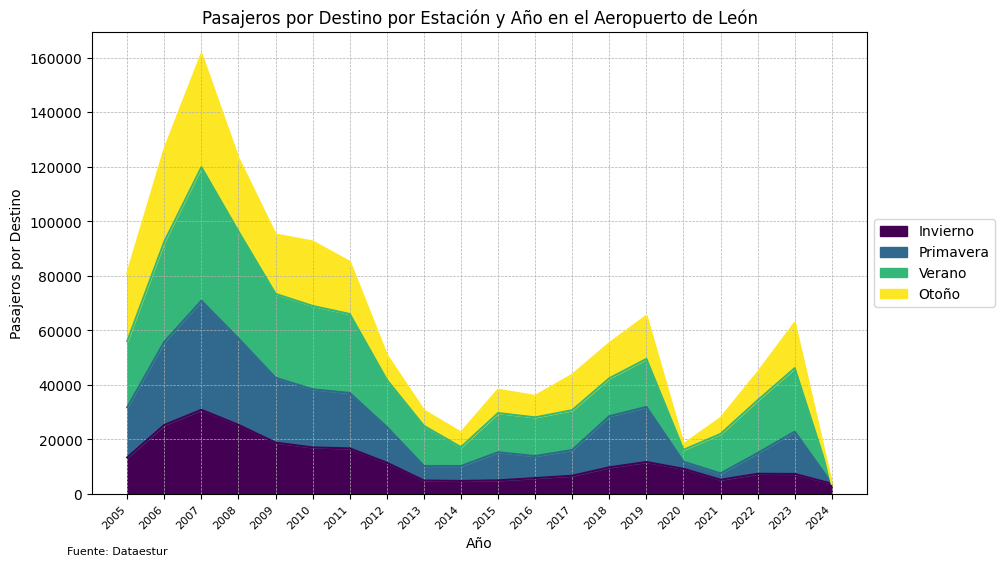

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

DF = pd.read_excel('aena_destinos.xlsx', dtype={'AÑO': 'category'})

def mes_a_estacion(mes):
    if mes in [12, 1, 2]:
        return 'Invierno'
    elif mes in [3, 4, 5]:
        return 'Primavera'
    elif mes in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

DF['Estacion'] = DF['MES'].apply(mes_a_estacion)

orden_estaciones = ['Invierno', 'Primavera', 'Verano', 'Otoño']

DF['Estacion'] = pd.Categorical(DF['Estacion'], categories=orden_estaciones, ordered=True)

media_por_año = DF.groupby('AÑO')['PASAJEROS_POR_DESTINO'].mean()

plt.figure(figsize=(10, 6))
ax = DF.groupby(['AÑO', 'Estacion'])['PASAJEROS_POR_DESTINO'].sum().unstack().plot(kind='area', stacked=True, cmap='viridis', ax=plt.gca(), legend=False, x_compat=True)
plt.xlabel('Año')
plt.ylabel('Pasajeros por Destino')
plt.title('Pasajeros por Destino por Estación y Año en el Aeropuerto de León') 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))  
plt.figtext(0.1, 0.01, 'Fuente: Dataestur', horizontalalignment='left', fontsize=8) 

ax.set_xticks(range(len(DF['AÑO'].unique())))
ax.set_xticklabels(DF['AÑO'].unique(), rotation=45, ha='right', fontsize=8) 
plt.show()